In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSBDA/Dataset/airquality.csv')
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [ ]:
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
categorical_cols = ['AQI_Bucket']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

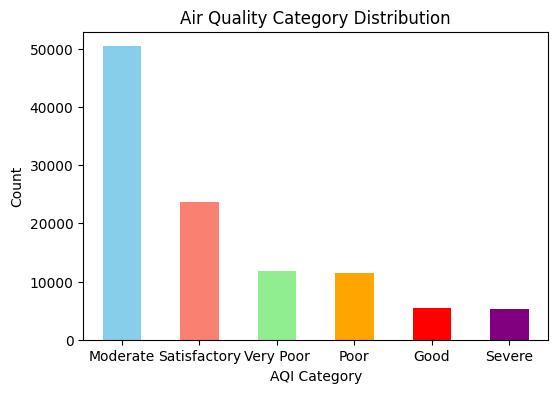

In [ ]:
plt.figure(figsize=(6,4))
df['AQI_Bucket'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange', 'red', 'purple'])
plt.title('Air Quality Category Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

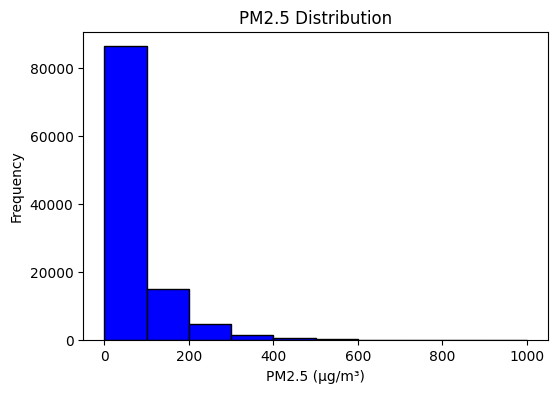

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['PM2.5'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x400 with 0 Axes>

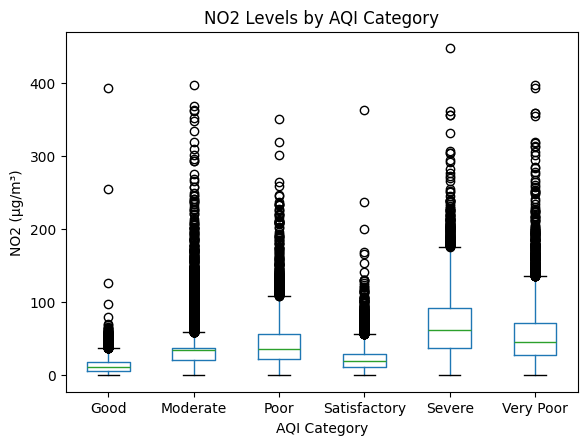

In [ ]:
plt.figure(figsize=(6,4))
df.boxplot(column='NO2', by='AQI_Bucket', grid=False)
plt.title('NO2 Levels by AQI Category')
plt.suptitle('')
plt.xlabel('AQI Category')
plt.ylabel('NO2 (µg/m³)')
plt.xticks(rotation=0)
plt.show()

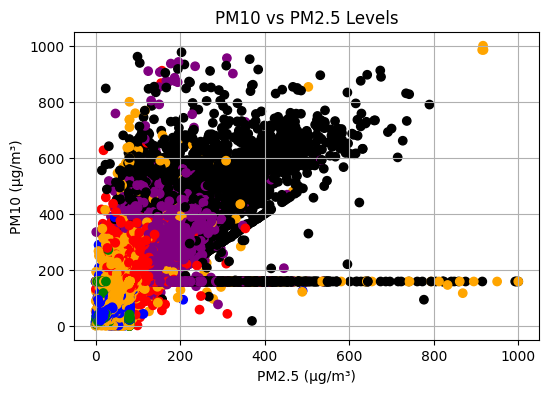

In [ ]:
plt.figure(figsize=(6,4))
colors = df['AQI_Bucket'].map({
    'Good': 'green', 'Satisfactory': 'blue', 'Moderate': 'orange',
    'Poor': 'red', 'Very Poor': 'purple', 'Severe': 'black'
})
plt.scatter(df['PM2.5'], df['PM10'], c=colors)
plt.title('PM10 vs PM2.5 Levels')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()

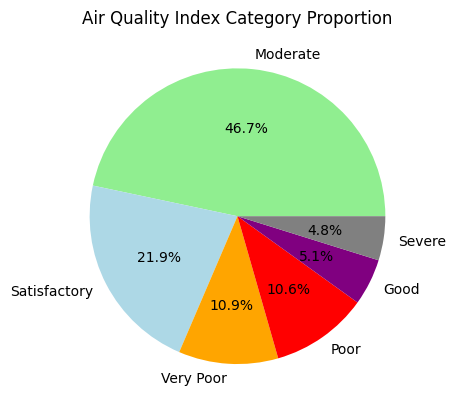

In [ ]:
df['AQI_Bucket'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightblue', 'orange', 'red', 'purple', 'grey'])
plt.title('Air Quality Index Category Proportion')
plt.ylabel('')
plt.show()